<a href="https://colab.research.google.com/github/hardikkamboj/Google-Earth-Engine-Notebooks/blob/main/USE_CASES/Analyzing_cyclone_winston/Cyclone_Winston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

### INSTALL THE REQUIRED LIBRARIES

In [2]:
!pip install -q tropycal
!pip install -q cartopy

     |████████████████████████████████| 7.2 MB 16.1 MB/s 
     |████████████████████████████████| 10.8 MB 10.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 23.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 78.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 71.1 MB/s 


In [3]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.0
Uninstalling Shapely-1.8.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos--no-undefined-dcd1b562.so
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-74dec7a7.so.1.14.2
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? t
Your response ('t') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.0
     |████████████████████████████████| 278 kB 14.7 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import tropycal.tracks as tracks
import datetime as dt

In [5]:
# load the trackDataset Object 
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (46.21 seconds)


# Trajectory of Cyclone Winston

In [7]:
winston = ibtracs.get_storm(('winston',2016))

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4665: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = asanyarray(arr)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4671: ShapelyDeprecationWarning: The array interface is d

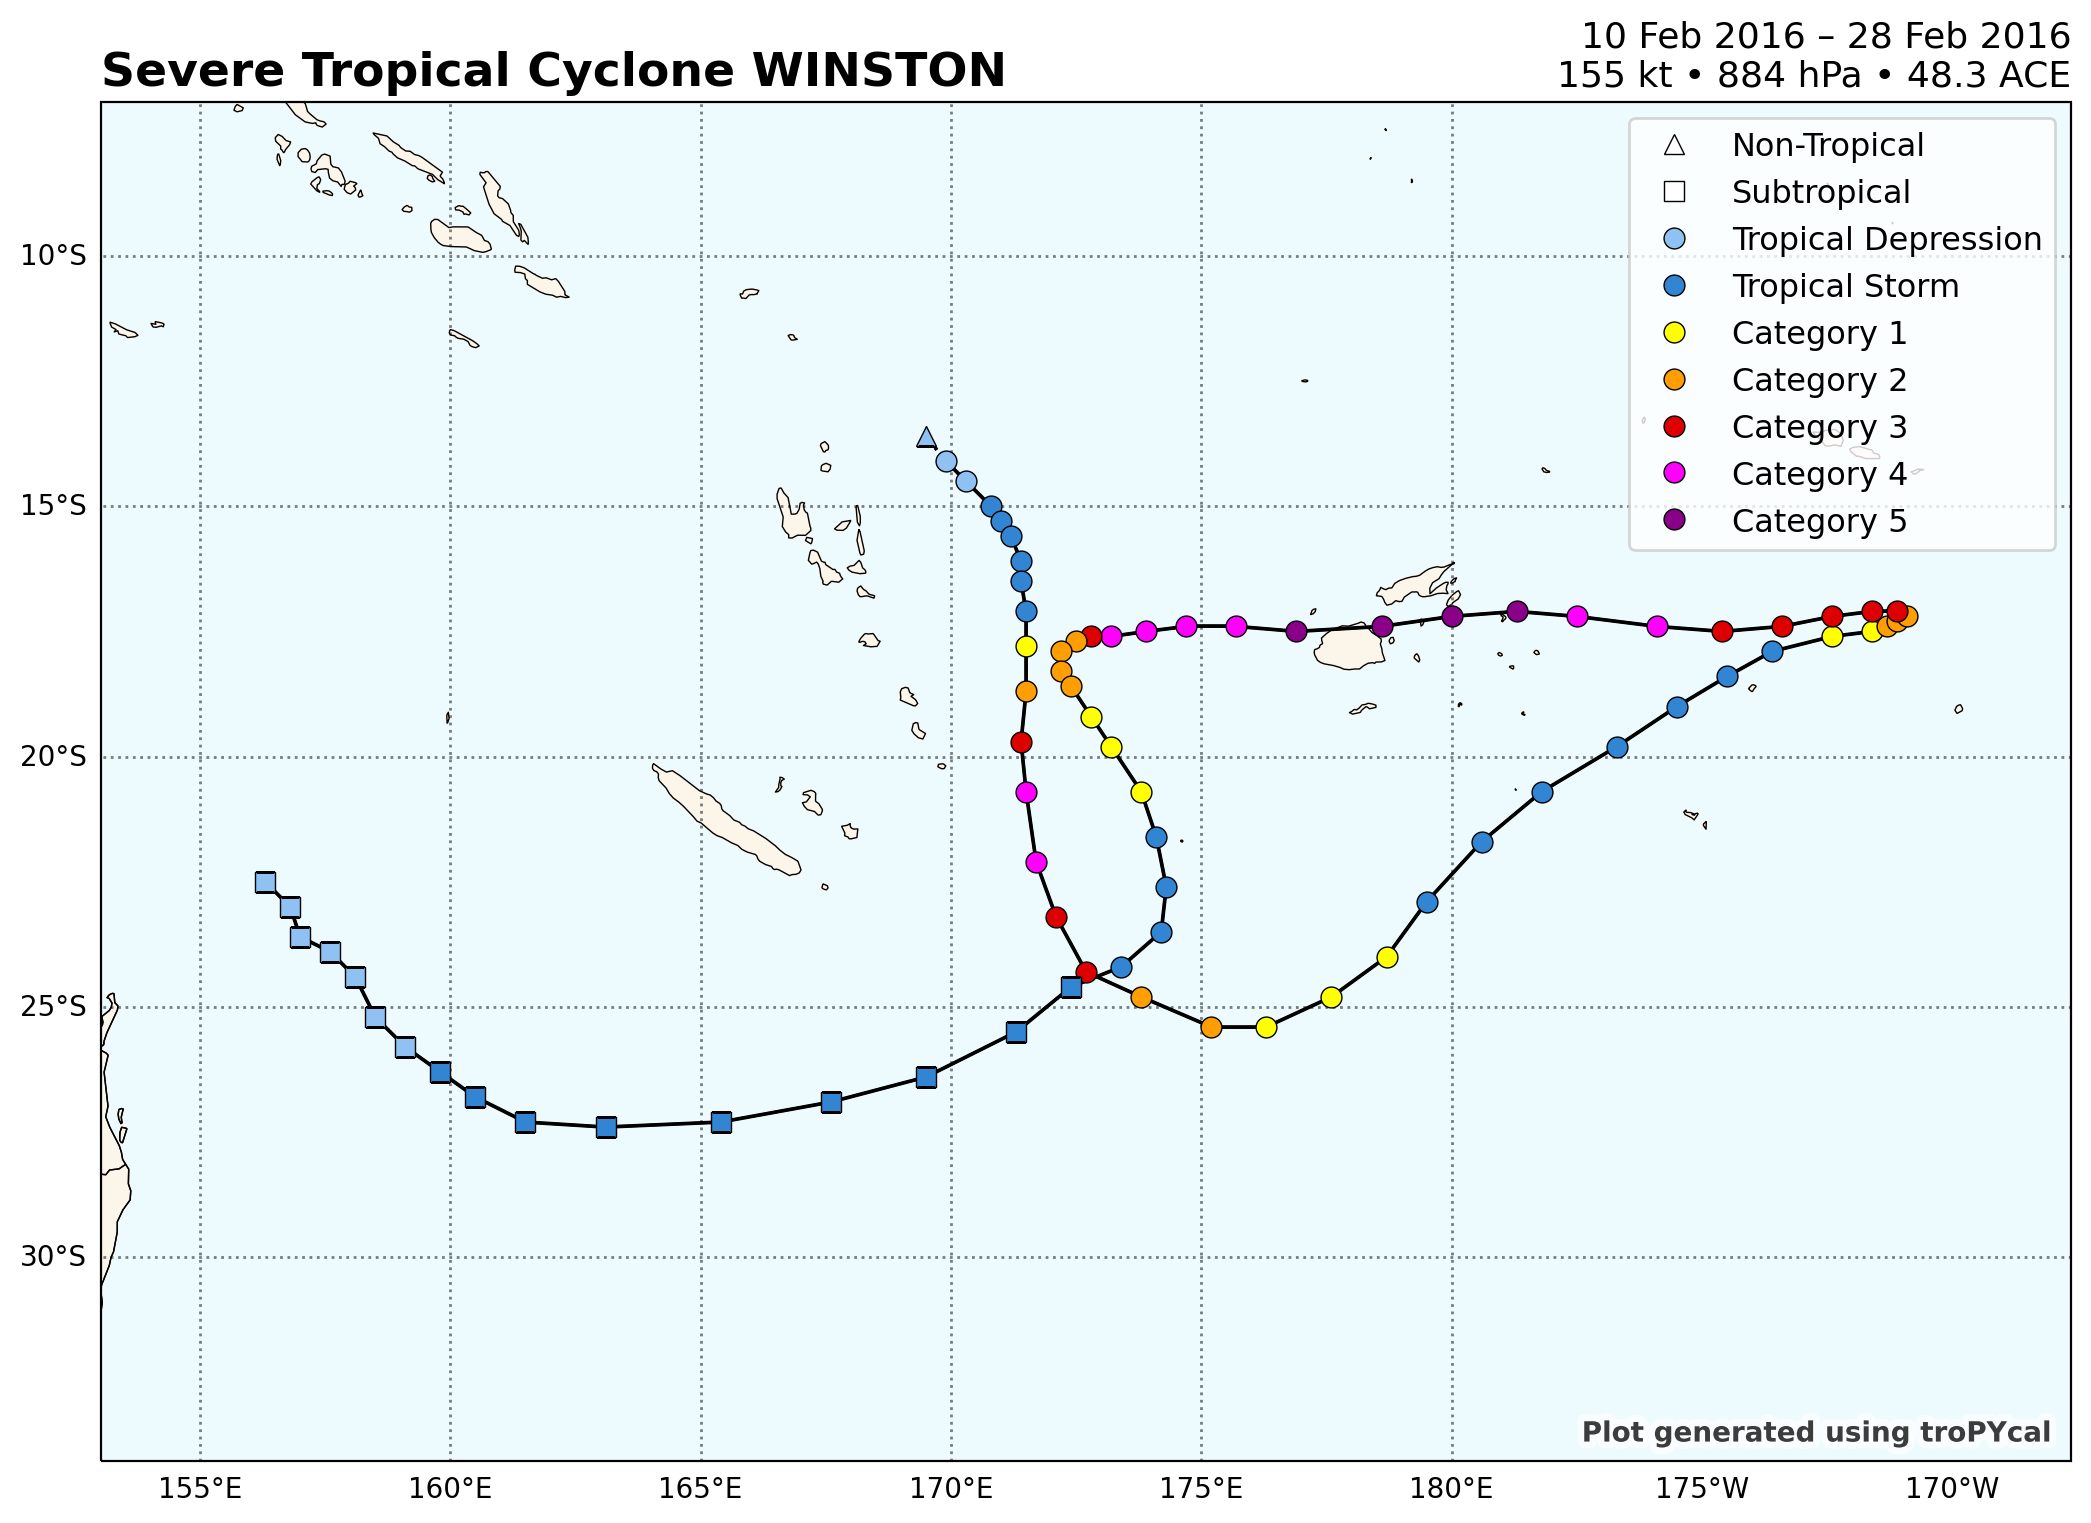

In [8]:
winston.plot()

# Zooming over KORO Island 